In [2]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.decomposition import PCA

In [16]:
import seaborn as sns

In [3]:
df = pd.read_excel('PCA India Data_Census.xlsx')
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.shape

(640, 61)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [9]:
df.duplicated(keep=False).sum()

0

In [11]:
df['State'].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Sikkim                       4
Tripura                      4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Dadara &

In [12]:
df.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [13]:
df.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [14]:
df_sel = df.drop(['State Code','Dist.Code','State','Area Name'],axis=1)
df_sel.shape

(640, 57)

In [15]:
df_sel.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [17]:
import matplotlib.pyplot as plt

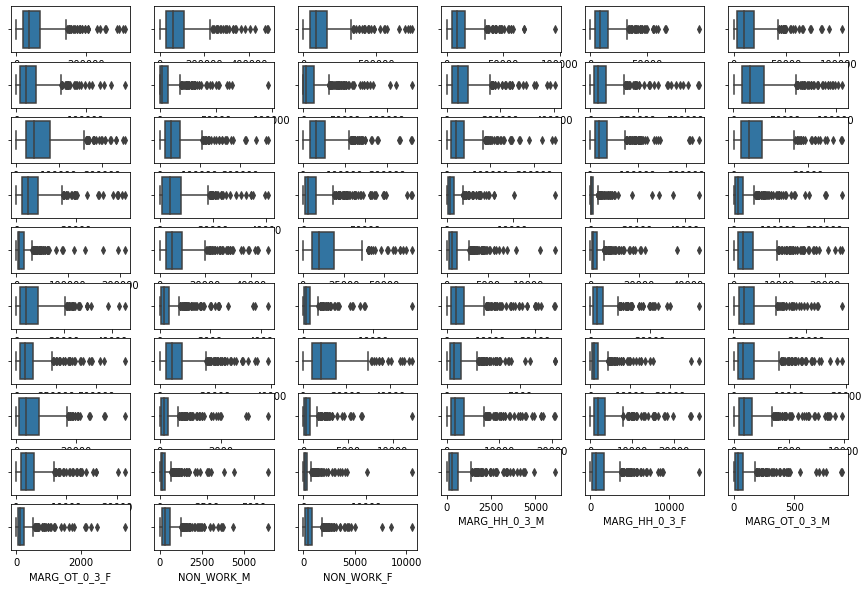

In [20]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df_sel.columns):
    plt.subplot(10,6,i+1)
    sns.boxplot(x=df_sel[j])

In [193]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [194]:
scaler = PowerTransformer()
df_scaled = pd.DataFrame(scaler.fit_transform(df_sel),columns=df_sel.columns)

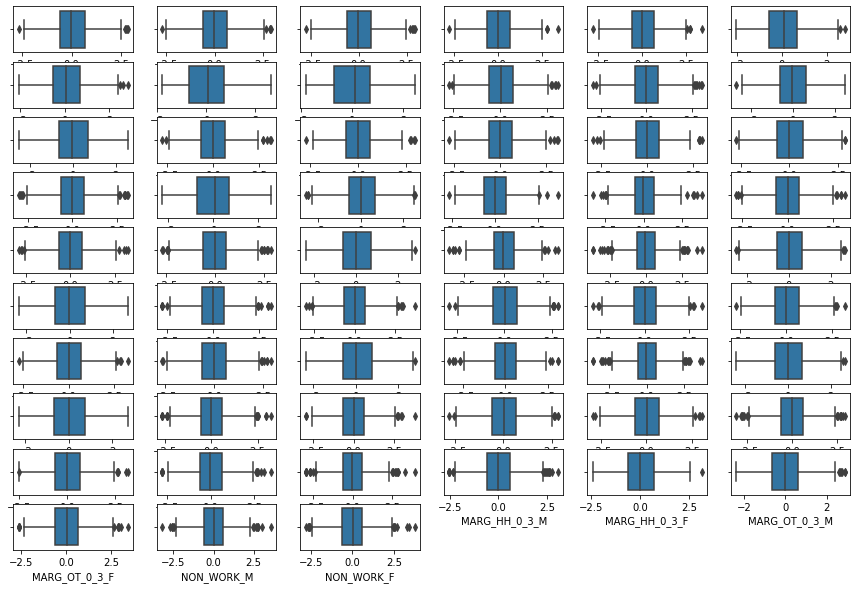

In [195]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df_scaled.columns):
    plt.subplot(10,6,i+1)
    sns.boxplot(x=df_scaled[j])

In [196]:
df['MAINWORK_M'].describe()

count       640.000000
mean      30204.446875
std       31480.915680
min          65.000000
25%        9787.000000
50%       21250.500000
75%       40119.000000
max      247911.000000
Name: MAINWORK_M, dtype: float64

In [197]:
df.groupby('State').MAINWORK_M.max().sort_values(ascending=False)

State
Maharashtra                 247911
West Bengal                 239755
Karnataka                   217193
Gujarat                     150066
Kerala                      147448
Tamil Nadu                  100825
Andhra Pradesh               99584
Uttar Pradesh                91787
Punjab                       89444
Bihar                        87616
NCT of Delhi                 86850
Rajasthan                    82206
Madhya Pradesh               65693
Odisha                       60452
Assam                        53434
Chhattisgarh                 52507
Meghalaya                    43140
Tripura                      34847
Uttarakhand                  34740
Himachal Pradesh             34669
Jharkhand                    34306
Jammu & Kashmir              33774
Haryana                      32813
Goa                          30635
Puducherry                   22637
Chandigarh                   19671
Manipur                      12465
Mizoram                      10156
Andaman & Nico

In [198]:
df_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.285328,-0.827894,-0.970115,-0.415835,-0.326217,-1.967062,-2.042753,0.025864,-0.066315,-0.971174,...,0.177944,-0.816800,0.322411,-0.065841,0.630256,-0.695718,-0.083657,-0.594297,-0.209491,-0.622097
1,-1.422744,-0.962589,-1.155280,-0.647290,-0.761472,-1.925311,-1.961897,-0.582304,-0.662574,-1.141278,...,-0.548584,-0.852232,0.039554,-0.090361,-0.363101,-0.975907,0.591965,0.408850,-0.704613,-0.848194
2,-1.621670,-1.658668,-1.629688,-1.620122,-1.643413,-1.967062,-1.961897,0.565625,0.580173,-1.655499,...,-1.657718,-1.718183,-0.668421,-0.726465,-2.148050,-1.581237,-2.376531,-1.901413,-1.229241,-1.522093
3,-2.213737,-2.068805,-2.114478,-1.952413,-1.863104,-2.026171,-2.042753,0.160839,0.123480,-2.092029,...,-1.312167,-1.563264,-0.452195,-0.490593,-1.712404,-1.443823,-1.412051,-1.488092,-0.845674,-1.543417
4,-0.997614,-0.925260,-0.965450,-0.528501,-0.591531,-1.848154,-1.843491,0.725860,0.641318,-0.978712,...,-0.090212,-0.002578,1.077665,1.093717,-0.297503,-0.591732,-0.293837,-0.007047,-0.507999,0.063442


In [199]:
pca = PCA(n_components=0.90)

In [200]:
pca

PCA(n_components=0.9)

In [201]:
output = pca.fit_transform(df_scaled)

<AxesSubplot:>

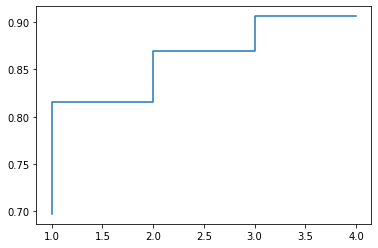

In [202]:
sns.lineplot(x=range(1,pca.explained_variance_ratio_.shape[0]+1),y=np.cumsum(pca.explained_variance_ratio_),drawstyle='steps-pre')

In [203]:
np.cumsum(pca.explained_variance_ratio_)

array([0.69697691, 0.81518473, 0.8692359 , 0.90640842])

<AxesSubplot:>

<Figure size 360x720 with 0 Axes>

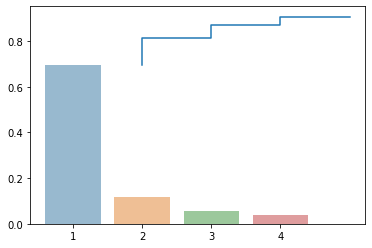

In [205]:
plt.figure(figsize=(5,10))
fig,ax = plt.subplots()
sns.barplot(x=np.arange(1,5),y=pca.explained_variance_ratio_,ax=ax,alpha=0.5)
sns.lineplot(x=range(1,pca.explained_variance_ratio_.shape[0]+1),y=np.cumsum(pca.explained_variance_ratio_),drawstyle='steps-pre',ax=ax)

<AxesSubplot:>

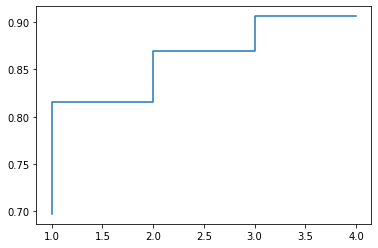

In [206]:
sns.lineplot(x=range(1,pca.explained_variance_ratio_.shape[0]+1),y=np.cumsum(pca.explained_variance_ratio_),drawstyle='steps-pre')

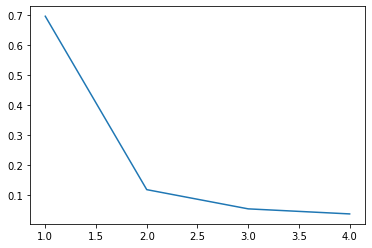

In [208]:
sns.lineplot(x=np.arange(1,5),y=pca.explained_variance_ratio_,markers=["o"]);

In [209]:
np.cumsum(pca.explained_variance_ratio_)

array([0.69697691, 0.81518473, 0.8692359 , 0.90640842])

In [210]:
pca.explained_variance_ratio_

array([0.69697691, 0.11820782, 0.05405117, 0.03717253])

In [211]:
output.shape

(640, 4)

In [212]:
pca.components_.shape

(4, 57)

In [213]:
df_scaled@pca.components_.T

,0,1,2,3
0,5.709755,-1.343404,-2.232624,-1.600150
1,5.860674,-0.620523,-2.754531,-2.123793
2,10.879729,-0.700656,-0.194049,1.888742
3,13.210620,-0.712710,-1.051717,-0.557300
4,5.168499,-3.171927,-1.548756,0.582625
...,...,...,...,...
635,14.641438,5.443704,-1.053806,-0.860970
636,9.477882,3.845752,-0.417654,-2.073315
637,14.011491,2.299677,-1.428141,-2.490462
638,12.733274,1.284046,-1.401977,-0.002303


In [224]:
eigens = pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4'],index=df_scaled.columns)

In [225]:
eigens

,PC1,PC2,PC3,PC4
No_HH,-0.147377,0.101351,0.085877,0.083603
TOT_M,-0.151309,0.092560,-0.032651,0.056497
TOT_F,-0.151335,0.093750,0.023343,0.077022
M_06,-0.150112,0.046301,-0.069030,0.032968
F_06,-0.150623,0.040524,-0.058704,0.026402
M_SC,-0.137523,0.092059,-0.048410,-0.026662
F_SC,-0.138181,0.090414,-0.003938,-0.020230
M_ST,-0.016571,-0.126517,0.378308,0.214351
F_ST,-0.016321,-0.125635,0.389950,0.208852
M_LIT,-0.148593,0.111926,-0.027507,0.087933


In [226]:
eigens.shape

(57, 4)

In [227]:
df_scaled@eigens[['PC1']]

,PC1
0,5.709755
1,5.860674
2,10.879729
3,13.210620
4,5.168499
...,...
635,14.641438
636,9.477882
637,14.011491
638,12.733274


In [228]:
eigens.PC1@eigens.PC2.T

2.255140518769849e-16

In [229]:
np.dot(eigens.PC1,eigens.PC2)

2.255140518769849e-16

In [230]:
output.shape

(640, 4)

In [231]:
df_new = pd.concat([df[[i for i in df.columns if i not in df_scaled.columns]],pd.DataFrame(output,columns=eigens.columns)],axis=1)

In [232]:
df_new

,State Code,Dist.Code,State,Area Name,kind,PC1,PC2,PC3,PC4
0,1,1,Jammu & Kashmir,Kupwara,Odd,5.709755,-1.343404,-2.232624,-1.600150
1,1,2,Jammu & Kashmir,Badgam,Odd,5.860674,-0.620523,-2.754531,-2.123793
2,1,3,Jammu & Kashmir,Leh(Ladakh),Odd,10.879729,-0.700656,-0.194049,1.888742
3,1,4,Jammu & Kashmir,Kargil,Odd,13.210620,-0.712710,-1.051717,-0.557300
4,1,5,Jammu & Kashmir,Punch,Odd,5.168499,-3.171927,-1.548756,0.582625
...,...,...,...,...,...,...,...,...,...
635,34,636,Puducherry,Mahe,Even,14.641438,5.443704,-1.053806,-0.860970
636,34,637,Puducherry,Karaikal,Even,9.477882,3.845752,-0.417654,-2.073315
637,35,638,Andaman & Nicobar Island,Nicobars,Odd,14.011491,2.299677,-1.428141,-2.490462
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,Odd,12.733274,1.284046,-1.401977,-0.002303


In [233]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State Code  640 non-null    int64  
 1   Dist.Code   640 non-null    int64  
 2   State       640 non-null    object 
 3   Area Name   640 non-null    object 
 4   kind        640 non-null    object 
 5   PC1         640 non-null    float64
 6   PC2         640 non-null    float64
 7   PC3         640 non-null    float64
 8   PC4         640 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 45.1+ KB


In [234]:
df_new['kind'] = np.where(df_new['State Code']%2==0,'Even','Odd')

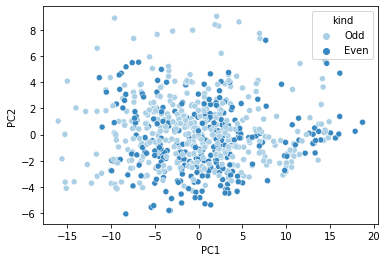

In [237]:
sns.scatterplot(x='PC1',y='PC2',data = df_new, hue='kind',palette='Blues');

<AxesSubplot:xlabel='TOT_M', ylabel='Count'>

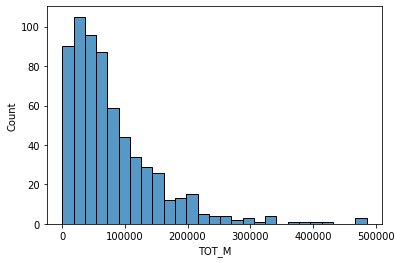

In [164]:
sns.histplot(df.TOT_M)

In [189]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler,StandardScaler,RobustScaler

In [187]:
sc = StandardScaler()

<AxesSubplot:ylabel='Count'>

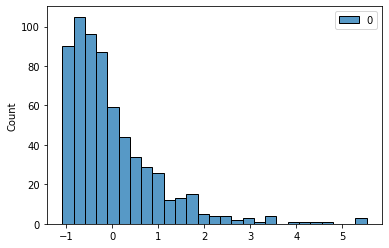

In [188]:
sns.histplot(sc.fit_transform(df[['TOT_M']]))

In [190]:
rs = RobustScaler()

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

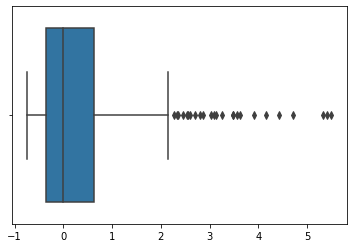

In [192]:
sns.boxplot(rs.fit_transform(df[['TOT_M']]))

In [172]:
pt = PowerTransformer()
pt

PowerTransformer()

<AxesSubplot:ylabel='Count'>

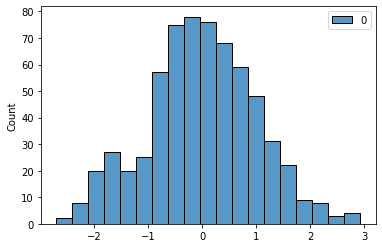

In [178]:
sns.histplot(pt.fit_transform(df[['TOT_M']]))

<AxesSubplot:ylabel='Count'>

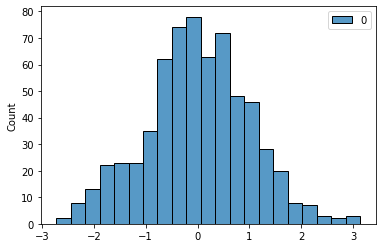

In [180]:
sns.histplot(pt.fit_transform(df[['TOT_WORK_M']]))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOT_M'>

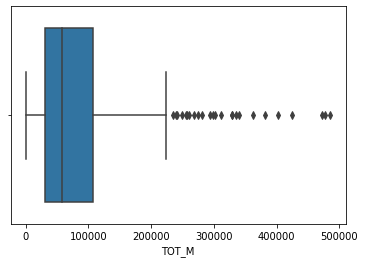

In [184]:
sns.boxplot(df.TOT_M)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

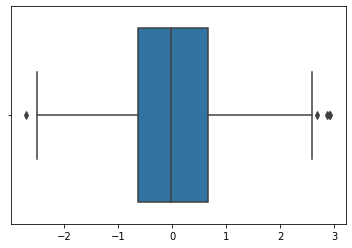

In [183]:
sns.boxplot(pt.fit_transform(df[['TOT_M']]))

<AxesSubplot:ylabel='Count'>

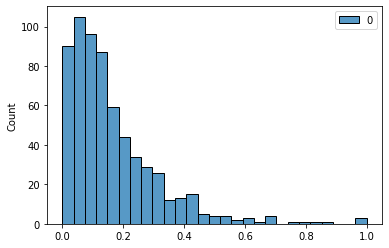

In [181]:
m = MinMaxScaler()
sns.histplot(m.fit_transform(df[['TOT_M']]))

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

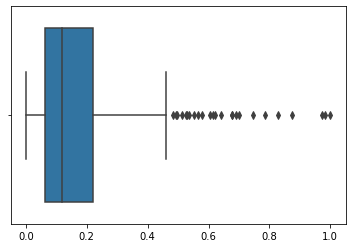

In [185]:
sns.boxplot(m.fit_transform(df[['TOT_M']]))